# 결정트리 (Decision Tree)

## 1. 결정 트리란? 

- 알고리즘 자체도 중요하지만 `random forest` 등과 같이 다른 알고리즘의 뿌리 역할 

### 1) 정의 
> 모든 가능한 결정 경로(Desion Path)를 이진 트리 형태로 구성 

### 2) 용어 
- `Node` : 트리의 각 분기점(=테스트)
- `Branch`: Node에서 갈라져 나오는 각각의 경로(=테스트 결과)
- `Leaf Node`: 더 이상 분기하지 않는 마지막 노드(=최종 결정/분류)

### 3) 장단점 
#### 장점 
- 해석이 쉽고 직관적임(=White box 모델)
  - `White Box` : 설명하기 쉬움 
- 범주형 및 연속형 데이터 모두에 적용 가능(=전처리 불필요)

#### 단점
- 과적합(overfitting) 위험이 있음
- 작은 변화에도 트리 구조가 크게 변할 수 있음(=불안정성)

### 4) 종류 

|구분|설명|
|---|---|
|ID3|기본적인 의사결정 트리 알고리즘 - 정보이득을 이용한 구성|
|CART|Gini 불순도를 이용한 의사결정 트리 알고리즘|
|C4.5,C5.0|ID3의 개선된 버전 - 연속형 속성 처리, 가지치기 등 기능 추가|


## 2. 엔트로피와 정보이득

- 결정트리를 이해하기 위한 `정보이득`(Information Gain) 개념

### 1) 엔트로피

#### 엔트로피 
- 주어진 데이터 집합의 `혼잡도`
- 정보가 많을 수록 엔트로피가 높을 가능성이 높음 
ㅡ
 #### 엔트로피 공식 
 $$
\textbf{Entropy} = - \sum_{i=1}^{m} p_i \log_2(p_i), \quad p_i = \frac{freq(C_i, S)}{|S|}
 $$

 - $p$ : probability 확률 
   - $S$ : 주어진 데이터들의 집합 
   - $C$ : 클래스값들의 집합 
   - $freq(C_i,S)$ : $S$에서 $C_i$에 속하는 레코드 수 
   - $|S|$ : 주어진 데이터들의 집합의 데이터 수

- 엔트로피가 가장 높은 상태 : $p=0.5$ 면 $\textbf{Entropy} = 1$
- 엔트로피가 가장 낮은 상태 : $p=0$ 이거나 $p=1$ 면 $\textbf{Entropy} = 0$

### 2) 정보이득 
> 정보이득 = (변화 전 엔트로피) - (변화 후 엔트로피)
- 시스템에 대해서 잘 알게 될 수록 데이터의 혼잡도는 낮아짐
- 즉, 엔트로피가 높은 상태에서 낮은 상태로 변화하는 것인 `정보 이득`

#### 정보이득 공식 
$$\textbf{Information Gain} = \textbf{Entropy(parent)} - (weight)\textbf{Entropy(child)}$$
- 부모의 엔트로피에서 자식의 엔트로피에 가중치를 곱한 값을 뺀 것 

## 3. 실습 - 붓꽃 데이터 분류 

### 0) 실습 설명 

- 붓꽃의 특성 데이터를 이요해 꽃의 종류를 맞추기

|구분|설명|
|---|---|
|Dataset|sklearn.datasets.load_iris()|
|Features|Sepal Length(꽃받침 길이),Sepal Width(꽃받침 너비),Petal Length(꽃잎 길이),Petal Width(꽃잎 너비)|
|Target|꽃 종류 (Setosa, Versicolor, Virginica)|
|Model|tree|
|평가 지표|sklearn.metrics.accuracy_score|

### 1) 필요 모듈 임포트

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

- 데이터 로드 

In [2]:
iris = load_iris()

- 데이터 확인
  - target이 sort되어 있음 (= 0, 1, 2 가 순서대로 되어있음) 
  - → 정확한 훈련을 위해 `random`하게 훈련 데이터를 처리해야함

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

- iris shape 확인 

In [4]:
iris.data.shape

(150, 4)

- feature 이름과 target 이름 출력하기
  - `feature names`: 
    - 'sepal length (cm)'
    - 'sepal width (cm)'
    - 'petal length (cm)'
    - 'petal width (cm)'
  - `target names`: 
    - 0 : 'setosa' 
    - 1 : 'versicolor' 
    - 2 : 'virginica'

In [5]:
print("feature names:", iris.feature_names)
print("target names:", iris.target_names)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


### 3) 훈련 데이터와 테스트 데이터로 분리하기

- 필요 라이브러리 임포트

In [6]:
from sklearn.model_selection import train_test_split

- 데이터 분리를 위한 라이브러리 임포트
```
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.3, random_state=42)
```
- `X_train, X_test, y_train, y_test` : 훈련용X,테스트X, 훈련용y,테스트y
- `train_test_split` : 데이터 분리를 위한 함수 
- `(X, y, test_size=0.2, random_state=42)`
  - `X` : X 데이터 -> `iris.data`
  - `y` : Target 값  -> `iris.target`
  - `test_size` : 테스트용 데이터로 얼마의 비율을 가져갈 것인가 → `0.3` : 30% 사용 
  - `random_state` : 랜덤 시드

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.3, random_state=42)

- shape 확인

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### 4) 결정 트리 모델 생성 및 학습

- 분류 문제 -> `DecisionTreeClassifier` 모델 생성
- `criterion` 
  - `gini` : cart 알고리즘 
  - `entropy` : ID3 알고리즘 
- `max_depth` : 최대 깊이
  - 너무 숫자가 크면 과적합(Overfitting) 문제가 일어남 

- 시각화를 쉽게 하기 위해서 `max_depth=2`

In [12]:
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)

- 훈련 시작

In [13]:
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

### 5) 예측 및 모델 평가 

- 예측 진행 

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("예측 결과:", y_pred)

예측 결과: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


- 정확도 평가 : 97.7%

In [17]:
from sklearn.metrics import accuracy_score
print("정확도 평가 : " ,accuracy_score(y_test, y_pred))

정확도 평가 :  0.9777777777777777


### 6) 시각화 진행

- 시각화를 통해 의사결정나무 구조 확인하기

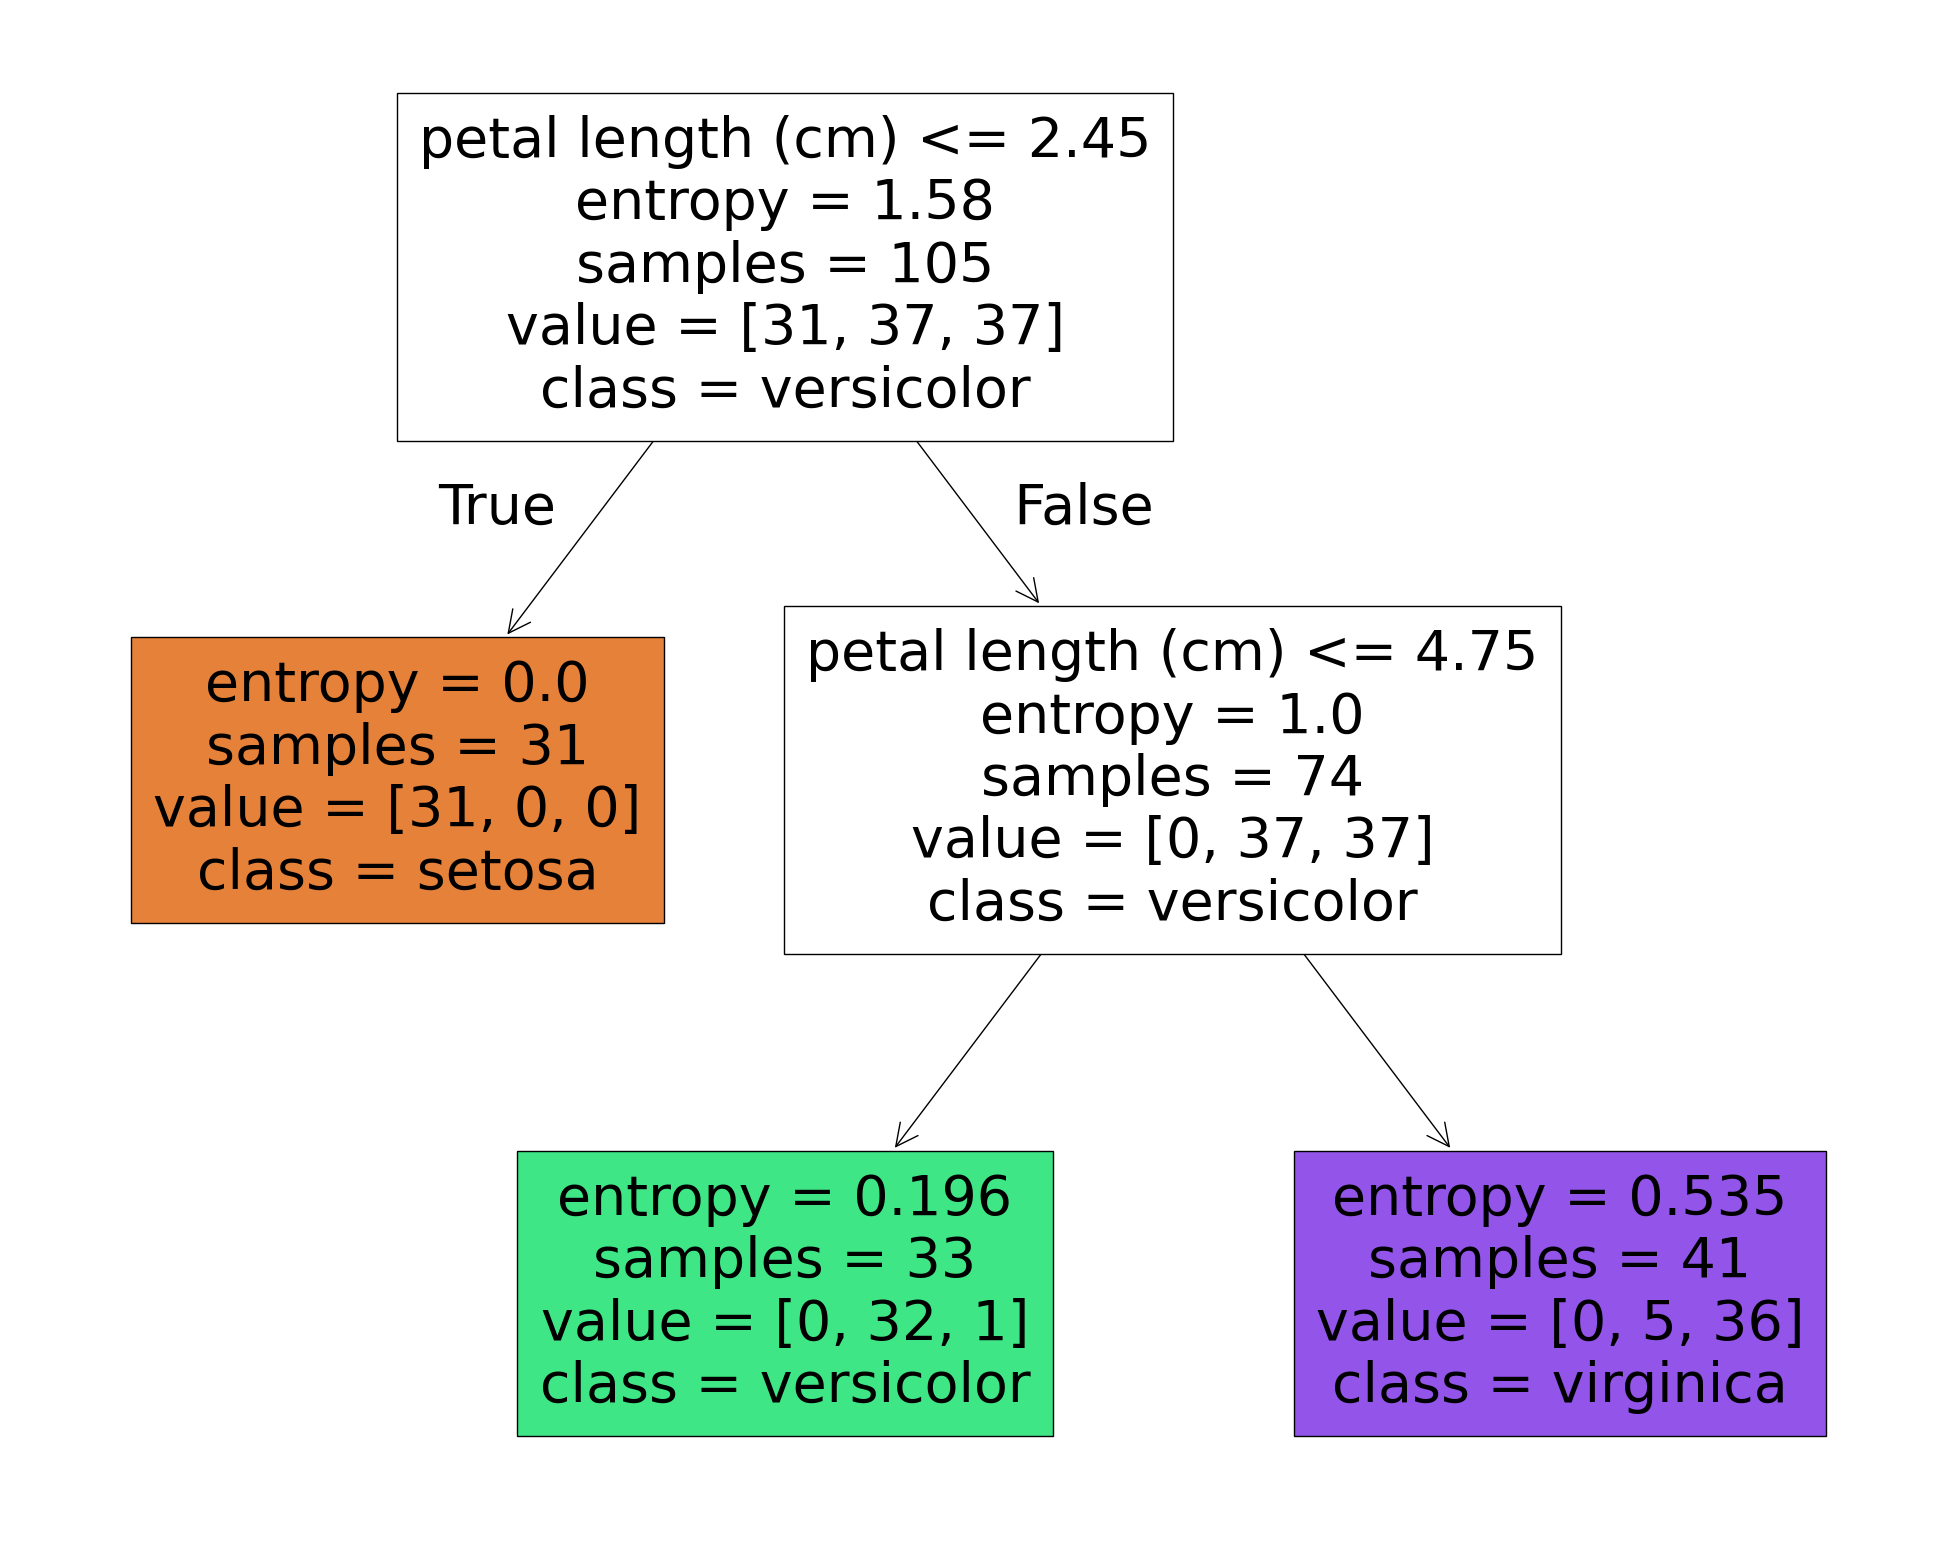

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))

_=tree.plot_tree(model,
                 feature_names=iris.feature_names,
                 class_names=iris.target_names,
                 filled=True)